# Reto  Módulo 1
---
Gamaliel Marines | A01708746

# Connect to Drive

In [379]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Advanced AI/WorkShops"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Advanced AI/WorkShops


# Imports

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize

# Read and Load the Datasets

In [381]:
data = pd.read_csv("dataus2024.csv")
firms = pd.read_csv("Firms US 2024.csv")

In [382]:
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.879221,104.0000,452000.000,2000,NaN,NaN,1,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2186000.0,0.0,44.589833,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2510000.0,0.0,29.587999,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,2758000.0,0.0,33.102282,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,3070000.0,0.0,18.579600,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0


In [383]:
firms1 = firms[["empresa","Nombre","status","naics1"]]
firms1.columns=['firm','Empresa','status','industria']

data = pd.merge(data,firms1,on="firm",how="left")

In [384]:
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,2000,NaN,NaN,1,NaN,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0,"Agilent Technologies, Inc",activo,Industrias manufactureras


**CALCULATE THE VARIABLE COLUMN FOR NET INCOME AND OTHER ASSOCIATED VARIABLES:**

- *Gross Profit = Revenue - COGS*  
  - **COGS** = Cost of Goods Sold; these are VARIABLE expenses that change with sales.  
- *Operating Profit before Tax = EBIT (Earnings Before Interest and Taxes)*

- **EBIT** = GROSS PROFIT - SGAE (Selling, General, and Administrative Expenses)

- **NET INCOME** = EBIT - FINEXP (Interest payments on loans) - INCOMETAX (Income tax payments) + OTHERINCOME (Non-core revenue) + EXTRAORDINARYITEMS (Extraordinary sales)

In [385]:
data['GROSSPROFIT'] = data['revenue'] - data['cogs']
data['EBIT'] = data['GROSSPROFIT'] - data['sgae']
data['NETINCOME'] = data['EBIT'] - data['finexp'] - data['incometax'] + data['otherincome'] + data['extraordinaryitems']
data['EBT'] = data['EBIT'] - data['finexp'] + data['otherincome'] + data['extraordinaryitems']

# CALCULATE MARKET VALUE AND BOOK VALUE

**Market Value = MARKET VALUE = originalprice * sharesoutstanding**  
- **originalprice** = original price of the stock  
- **sharesoutstanding** = number of shares available  

**Book Value = BOOK VALUE = totalassets - totalliabilities**  
- **totalassets** = total assets (resources)  
- **totalliabilities** = total liabilities  

In [386]:
data['BOOKVALUE'] = data['totalassets'] - data['totalliabilities']
data['MARKETVALUE'] = data['originalprice'] * data['sharesoutstanding']

AHORA CALCULAMOS LOS RETORNOS DE ACCIÓN PARA TODAS LAS EMPRESAS (TRIMESTRALES Y ANUALES)

**RETORNOS SIMPLES**
- retorno trimestral = QR = (adjprice / adjprice{t-1} - 1
- retorno anual = YR = adjprice / adjprice {t-4} - 1

**RETORNOS CONTINUOS COMPUESTOS**

- ret trimestral = qr = log(adjprice) - log(adjprice{t-1}) = log (adjprice / adjprice{t-1})
- ret anual = yr = log(adjprice) - log (adjprice{t-4})




GENERO UN ÍNDICE EN EL DATASET POR FIRM-QUARTER:

In [387]:
data['qdate'] = pd.PeriodIndex(data.q, freq='Q')
data.set_index(['firm','qdate'], inplace = True)
data.head()
data.index

MultiIndex([(     'A', '2000Q1'),
            (     'A', '2000Q2'),
            (     'A', '2000Q3'),
            (     'A', '2000Q4'),
            (     'A', '2001Q1'),
            (     'A', '2001Q2'),
            (     'A', '2001Q3'),
            (     'A', '2001Q4'),
            (     'A', '2002Q1'),
            (     'A', '2002Q2'),
            ...
            ('ZY_old', '2022Q1'),
            ('ZY_old', '2022Q2'),
            ('ZY_old', '2022Q3'),
            ('ZY_old', '2022Q4'),
            ('ZY_old', '2023Q1'),
            ('ZY_old', '2023Q2'),
            ('ZY_old', '2023Q3'),
            ('ZY_old', '2023Q4'),
            ('ZY_old', '2024Q1'),
            ('ZY_old', '2024Q2')],
           names=['firm', 'qdate'], length=557181)

# Returns
---

In [388]:
data['cc_return_q'] = np.log(data['adjprice']) - np.log(data['adjprice'].shift(1))
print("Actual")

print(data['cc_return_q'])
data['cc_return_y'] = np.log(data['adjprice']) - np.log(data['adjprice'].shift(4))
print("Futuro")
print(data['cc_return_y'])

Actual
firm    qdate 
A       2000Q1         NaN
        2000Q2   -0.343710
        2000Q3   -0.410137
        2000Q4    0.112233
        2001Q1   -0.577538
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_q, Length: 557181, dtype: float64
Futuro
firm    qdate 
A       2000Q1         NaN
        2000Q2         NaN
        2000Q3         NaN
        2000Q4         NaN
        2001Q1   -1.219152
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_y, Length: 557181, dtype: float64


*Future annual stock cc return (one-quarter ahead)*

*Contemporary continuous compounded returns (cc returns) for each firm-quarter.*

# Group by FIRM

In [389]:
data['cc_return_q_future'] = data.groupby('firm')['cc_return_q'].shift(-1)
print(data['cc_return_q_future'])
data['cc_return_y_future'] = data.groupby('firm')['cc_return_q'].shift(-4)
print(data['cc_return_y_future'])

data['cc_return_y_future'] = data.groupby('firm')['cc_return_y'].shift(-1)
print(data['cc_return_y_future'])
data['cc_return_y_future'] = data.groupby('firm')['cc_return_y'].shift(-4)
print(data['cc_return_y_future'])


firm    qdate 
A       2000Q1   -0.343710
        2000Q2   -0.410137
        2000Q3    0.112233
        2000Q4   -0.577538
        2001Q1    0.056001
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_q_future, Length: 557181, dtype: float64
firm    qdate 
A       2000Q1   -0.577538
        2000Q2    0.056001
        2000Q3   -0.508265
        2000Q4    0.377280
        2001Q1    0.203950
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: cc_return_y_future, Length: 557181, dtype: float64
firm    qdate 
A       2000Q1         NaN
        2000Q2         NaN
        2000Q3         NaN
        2000Q4   -1.219152
        2001Q1   -0.819441
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
    

# FINANCIAL RATIOS

## ROE (RETURN ON ASSETS)
---

- **ROE = NETINCOME/BOOKVALUE**


In [390]:
data['ROE'] = data['NETINCOME'] / data['BOOKVALUE']
print(data['ROE'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    0.063981
        2000Q3    0.092207
        2000Q4    0.143780
        2001Q1    0.027793
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: ROE, Length: 557181, dtype: float64


## CURRENT RATIO

---

- **CURRENT RATIO = CURRENT ASSESTS / CURRENT LIABILITIES**

In [391]:
data['CURRENTRATIO'] = data['currentassets'] / data['currentliabilities']
print(data['CURRENTRATIO'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    2.313358
        2000Q3    2.129084
        2000Q4    2.050399
        2001Q1    1.778827
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: CURRENTRATIO, Length: 557181, dtype: float64


## DEBT TO EQUITY

---

- **DEB-TOEQUITY = TOTAL LIABILITIES / EQUITY**

In [392]:
data['DEBTTOEQUITY'] = data['totalliabilities'] / data['BOOKVALUE']
print(data['DEBTTOEQUITY'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    0.577122
        2000Q3    0.596695
        2000Q4    0.600190
        2001Q1    0.661794
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: DEBTTOEQUITY, Length: 557181, dtype: float64


## GROSS MARGIN
---

- **GROSSMARGIN = GROSS PROFIT / REVENUE**

In [393]:
data['GROSSMARGIN'] = data['GROSSPROFIT'] / data['revenue']
print(data['GROSSMARGIN'])

firm    qdate 
A       2000Q1         NaN
        2000Q2    0.488269
        2000Q3    0.487907
        2000Q4    0.487422
        2001Q1    0.489968
                    ...   
ZY_old  2023Q2         NaN
        2023Q3         NaN
        2023Q4         NaN
        2024Q1         NaN
        2024Q2         NaN
Name: GROSSMARGIN, Length: 557181, dtype: float64


# Control Variables

In [394]:
data['EPS'] = data['NETINCOME'] / data['sharesoutstanding']
data['EPSP'] = data['EPS'] / data['originalprice']
data['BOOKTOMARKETR'] = data['BOOKVALUE'] / data['MARKETVALUE']

# 1.2 Firm Composition of the US financial market

EMPRESAS ACTIVAS QUE EXISTAN EN EL DATASET

In [395]:
empresasactivas = data[data['status'] == 'activo'].groupby('industria')['Empresa'].nunique()
print(empresasactivas)

industria
-                                                                                                   2
Agricultura, ganadería, aprovechamiento forestal, pesca y caza                                     17
Comercio al por mayor                                                                              74
Comercio al por menor                                                                             141
Construcción                                                                                       47
Empresas de electricidad, gas y agua                                                               78
Industrias manufactureras                                                                        1499
Información en medios masivos                                                                     243
Minería, explotación de canteras y extracción de petróleo y gas                                   109
Otros servicios excepto actividades gubernamentales                     

In [396]:
sum(empresasactivas)

3444

Show a table that shows statistics about the book value and market value by industry. What can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

In [397]:

industry_stats = data.groupby('industria')[['BOOKVALUE', 'MARKETVALUE']].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(industry_stats)


                                                       BOOKVALUE               \
                                                            mean       median   
industria                                                                       
-                                                   4.400692e+06  5709856.000   
Agricultura, ganadería, aprovechamiento foresta...  1.993336e+06   723518.000   
Comercio al por mayor                               1.229648e+06   645100.000   
Comercio al por menor                               2.601954e+06   616000.000   
Construcción                                        1.590709e+06   808110.000   
Corporativos                                        8.906397e+03     5000.001   
Empresas de electricidad, gas y agua                4.764161e+06  2367010.000   
Industrias manufactureras                           2.427419e+06   350874.000   
Información en medios masivos                       3.808701e+06   440711.000   
Minería, explotación de cant

**What can you say about the typical firm size in terms of market value and book value?**

The median book value provides a reliable measure of the typical size of companies within each industry. However, the market value reveals significant variation in company size across different industries. Market value can substantially increase the perceived size of industries, with manufacturing companies generally dominating the market due to their large market sizes.

**How much do these variables change within each industry?**

The standard deviation shows the extent to which company sizes, in terms of both book value and market value, differ within each industry. This indicates that there are some very large companies and others that are much smaller in comparison.

**How is firm size (in market value) distributed?**

The distribution of firm sizes based on market value is quite varied. For instance, in the manufacturing and business support services sectors, the size distribution is highly uneven. The manufacturing sector includes major companies like Apple, Amazon, IBM, and NVIDIA, whereas business support services lack such high-market-value firms. This results in an uneven distribution influenced by the presence of a few large conglomerates alongside many smaller firms.

Which are the biggest 10 US firms in terms of market value and how far they are from the typical market size of a US firm?

In [398]:
last_q = data[data['fiscalmonth'].isin([10, 11, 12])]

meanbookvalue = last_q['BOOKVALUE'].mean()
meanmarketvalue = last_q['MARKETVALUE'].mean()

topfirmsbookvalue = last_q.groupby('Empresa')[['BOOKVALUE']].mean().nlargest(10, 'BOOKVALUE')
topfirmsmarketvalue = last_q.groupby('Empresa')[['MARKETVALUE']].mean().nlargest(10, 'MARKETVALUE')

# Calculate the difference from the market average
topfirmsbookvalue['Difference from Market Average (BOOKVALUE)'] = topfirmsbookvalue['BOOKVALUE'] - meanbookvalue
topfirmsmarketvalue['Difference from Market Average (MARKETVALUE)'] = topfirmsmarketvalue['MARKETVALUE'] - meanmarketvalue

print("\nTop 10 Companies with the Highest Average BOOKVALUE in the Last Three Fiscal Months:")
print(topfirmsbookvalue)

print("\nTop 10 Companies with the Highest Average MARKETVALUE in the Last Three Fiscal Months:")
print(topfirmsmarketvalue)



Top 10 Companies with the Highest Average BOOKVALUE in the Last Three Fiscal Months:
                             BOOKVALUE  \
Empresa                                  
Berkshire Hathaway Inc    2.301427e+08   
Bank Of America Corp      1.952423e+08   
Jpmorgan Chase & Co       1.846668e+08   
Citigroup Inc             1.616072e+08   
Exxon Mobil Corp          1.484056e+08   
Wells Fargo & Company     1.255058e+08   
Alphabet Inc              1.144436e+08   
Chevron Corp              1.072952e+08   
AT&T Inc                  1.050246e+08   
General Electric Company  8.875175e+07   

                          Difference from Market Average (BOOKVALUE)  
Empresa                                                               
Berkshire Hathaway Inc                                  2.271061e+08  
Bank Of America Corp                                    1.922058e+08  
Jpmorgan Chase & Co                                     1.816303e+08  
Citigroup Inc                                         

In [399]:
meanbookvalue = data['BOOKVALUE'].mean()
meanmarketvalue = data['MARKETVALUE'].mean()

In [400]:
topfirmsbookvalue = data.groupby('Empresa')[['BOOKVALUE']].mean().nlargest(10, 'BOOKVALUE')
topfirmsmarketvalue = data.groupby('Empresa')[['MARKETVALUE']].mean().nlargest(10,'MARKETVALUE')

In [401]:
topfirmsbookvalue['Diferencia Promedio de Mercado (BOOKVALUE)'] = topfirmsbookvalue['BOOKVALUE'] - meanbookvalue
topfirmsmarketvalue['Diferencia Promedio de Mercado (MARKETVALUE)'] = topfirmsmarketvalue['MARKETVALUE'] - meanmarketvalue


In [402]:
print("\nTop 10 Companies with the Highest Average BOOKVALUE:")
print(topfirmsbookvalue)


Top 10 Companies with the Highest Average BOOKVALUE:
                             BOOKVALUE  \
Empresa                                  
Berkshire Hathaway Inc    2.234475e+08   
Bank Of America Corp      1.956184e+08   
Jpmorgan Chase & Co       1.823613e+08   
Citigroup Inc             1.611989e+08   
Exxon Mobil Corp          1.461258e+08   
Wells Fargo & Company     1.237882e+08   
Alphabet Inc              1.134736e+08   
Chevron Corp              1.058642e+08   
AT&T Inc                  1.031803e+08   
General Electric Company  8.762853e+07   

                          Diferencia Promedio de Mercado (BOOKVALUE)  
Empresa                                                               
Berkshire Hathaway Inc                                  2.204106e+08  
Bank Of America Corp                                    1.925815e+08  
Jpmorgan Chase & Co                                     1.793244e+08  
Citigroup Inc                                           1.581620e+08  
Exxon Mobil Cor

In [403]:
print("\nTop 10 Companies with the Highest Average MARKETVALUE:")
print(topfirmsmarketvalue)


Top 10 Companies with the Highest Average MARKETVALUE:
                           MARKETVALUE  \
Empresa                                  
Apple Inc                 7.114284e+08   
Microsoft Corp            6.949694e+08   
Alphabet Inc              5.923001e+08   
Meta Platforms, Inc       4.713809e+08   
Amazon.Com, Inc           4.093128e+08   
Exxon Mobil Corp          3.450452e+08   
Walmart Inc               2.598115e+08   
Johnson & Johnson         2.555702e+08   
General Electric Company  2.413596e+08   
Tesla, Inc                2.294606e+08   

                          Diferencia Promedio de Mercado (MARKETVALUE)  
Empresa                                                                 
Apple Inc                                                 7.025992e+08  
Microsoft Corp                                            6.861402e+08  
Alphabet Inc                                              5.834709e+08  
Meta Platforms, Inc                                       4.625517e+08  
A

In [404]:
print("\nDifference in Average BOOKVALUE Compared to Market Average:")
print(topfirmsbookvalue[['BOOKVALUE', 'Diferencia Promedio de Mercado (BOOKVALUE)']])


Difference in Average BOOKVALUE Compared to Market Average:
                             BOOKVALUE  \
Empresa                                  
Berkshire Hathaway Inc    2.234475e+08   
Bank Of America Corp      1.956184e+08   
Jpmorgan Chase & Co       1.823613e+08   
Citigroup Inc             1.611989e+08   
Exxon Mobil Corp          1.461258e+08   
Wells Fargo & Company     1.237882e+08   
Alphabet Inc              1.134736e+08   
Chevron Corp              1.058642e+08   
AT&T Inc                  1.031803e+08   
General Electric Company  8.762853e+07   

                          Diferencia Promedio de Mercado (BOOKVALUE)  
Empresa                                                               
Berkshire Hathaway Inc                                  2.204106e+08  
Bank Of America Corp                                    1.925815e+08  
Jpmorgan Chase & Co                                     1.793244e+08  
Citigroup Inc                                           1.581620e+08  
Exxon Mo

In [405]:
print("\nDifference in Average MARKETVALUE Compared to Market Average:")
print(topfirmsmarketvalue[['MARKETVALUE', 'Diferencia Promedio de Mercado (MARKETVALUE)']])


Difference in Average MARKETVALUE Compared to Market Average:
                           MARKETVALUE  \
Empresa                                  
Apple Inc                 7.114284e+08   
Microsoft Corp            6.949694e+08   
Alphabet Inc              5.923001e+08   
Meta Platforms, Inc       4.713809e+08   
Amazon.Com, Inc           4.093128e+08   
Exxon Mobil Corp          3.450452e+08   
Walmart Inc               2.598115e+08   
Johnson & Johnson         2.555702e+08   
General Electric Company  2.413596e+08   
Tesla, Inc                2.294606e+08   

                          Diferencia Promedio de Mercado (MARKETVALUE)  
Empresa                                                                 
Apple Inc                                                 7.025992e+08  
Microsoft Corp                                            6.861402e+08  
Alphabet Inc                                              5.834709e+08  
Meta Platforms, Inc                                       4.625517e

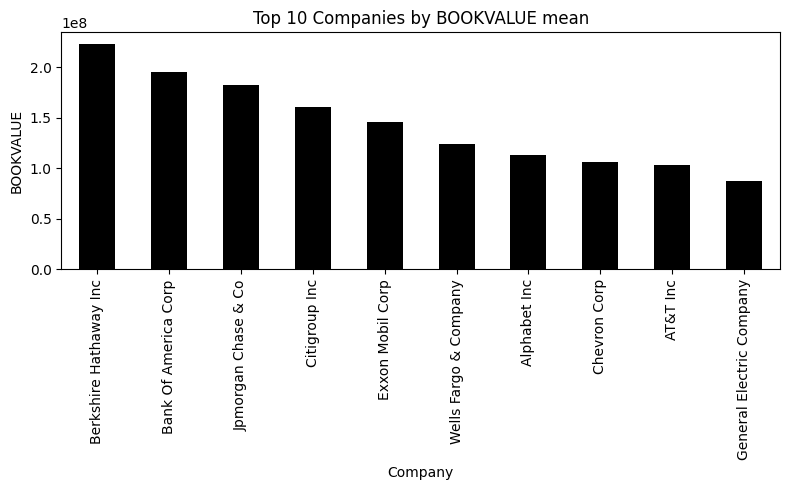

In [406]:
plt.figure(figsize=(8, 5))
topfirmsbookvalue['BOOKVALUE'].plot(kind='bar', color='black')
plt.title('Top 10 Companies by BOOKVALUE mean')
plt.ylabel('BOOKVALUE')
plt.xlabel('Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

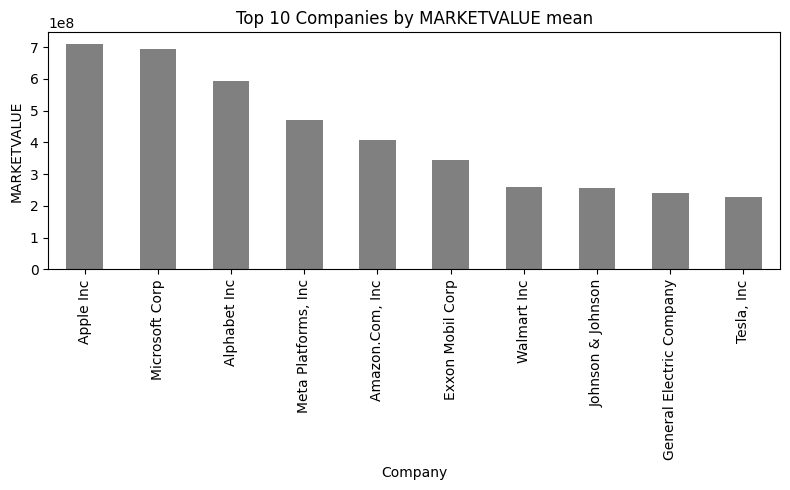

In [407]:
plt.figure(figsize=(8, 5))
topfirmsmarketvalue['MARKETVALUE'].plot(kind='bar', color='grey')
plt.title('Top 10 Companies by MARKETVALUE mean')
plt.ylabel('MARKETVALUE')
plt.xlabel('Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 1.3 Evolution of the US financial market

In [408]:
# Filtrar datos por mes fiscal 12
data_annual = data[data['fiscalmonth'] == 12]

# Agrupar por año y calcular el valor total de mercado
market_value_by_year = data_annual.groupby('year')['MARKETVALUE'].sum()

# Convertir Series a DataFrame
market_value_by_year_df = market_value_by_year.reset_index()
market_value_by_year_df.columns = ['Year', 'Total Market Value']

# Imprimir resultados
print("Evolution of the Total Value of the U.S. Financial Market by Fiscal Year:")
market_value_by_year_df


Evolution of the Total Value of the U.S. Financial Market by Fiscal Year:


,Year,Total Market Value
0,2000,1.271442e+10
1,2001,1.138682e+10
2,2002,9.382138e+09
3,2003,1.155087e+10
4,2004,1.310071e+10
5,2005,1.365024e+10
6,2006,1.529529e+10
7,2007,1.593777e+10
8,2008,1.024751e+10
9,2009,1.163598e+10


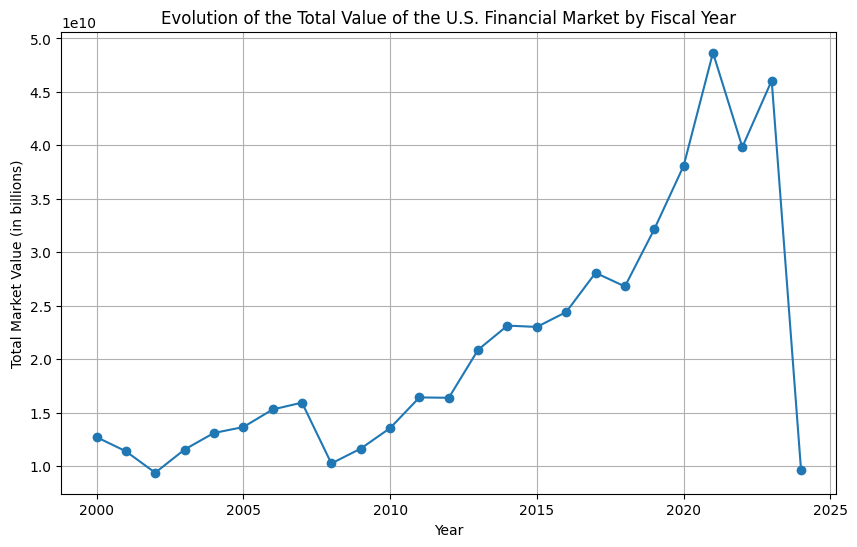

In [409]:
plt.figure(figsize=(10, 6))
plt.plot(market_value_by_year_df['Year'], market_value_by_year_df['Total Market Value'], marker='o')
plt.title("Evolution of the Total Value of the U.S. Financial Market by Fiscal Year")
plt.xlabel("Year")
plt.ylabel("Total Market Value (in billions)")
plt.grid(True)
plt.show()

- **How the total market value of the US market has changed over the years? Do a table and/or graph and explain**

The graph illustrates the fluctuations in the total market value of the U.S. market from 2000 to 2024, highlighting key economic events and their impact on market value.

From 2000 to 2002, there is a noticeable decline due to the burst of the dot-com bubble, which led to the collapse of numerous companies, steep drops in stock prices, and a recession. Following this period, the market value begins to recover, spurred by global economic growth and a strong real estate market.

Around 2008, another significant dip is visible, corresponding to the U.S. housing crisis and the global financial meltdown. However, the market shows a gradual recovery in subsequent years as economic conditions improve.

Most recently, in 2021, the COVID-19 pandemic caused another downturn, yet the market once again recovered, reflecting resilience in the face of global economic challenges.

Overall, the graph does not just present numbers but also captures the economic history, reflecting the impact of major financial crises and recoveries over the past two decades.



In [410]:
data_annual = data[data['fiscalmonth'] == 12]
revenue_and_income_by_year = data_annual.groupby('year').agg({
    'revenue': 'sum',
    'NETINCOME': 'sum'
})

revenue_and_income_by_year_df = revenue_and_income_by_year.reset_index()
revenue_and_income_by_year_df.columns = ['Year', 'Total Revenue', 'Total Net Income']

print("Evolution of Total Revenue and Net Income of the U.S. by Year:")
print(revenue_and_income_by_year_df)

Evolution of Total Revenue and Net Income of the U.S. by Year:
    Year  Total Revenue  Total Net Income
0   2000   6.656273e+09      3.448785e+08
1   2001   7.758654e+09      6.754650e+07
2   2002   7.575908e+09     -5.642922e+07
3   2003   8.213610e+09      3.645524e+08
4   2004   9.097849e+09      4.312209e+08
5   2005   9.971419e+09      5.229196e+08
6   2006   1.093114e+10      6.574464e+08
7   2007   1.159291e+10      6.098692e+08
8   2008   1.175305e+10      3.470076e+08
9   2009   1.075167e+10      5.619683e+08
10  2010   1.168569e+10      7.039269e+08
11  2011   1.354407e+10      8.276489e+08
12  2012   1.405378e+10      7.691981e+08
13  2013   1.441442e+10      9.085672e+08
14  2014   1.493200e+10      8.900909e+08
15  2015   1.445078e+10      6.479261e+08
16  2016   1.437061e+10      7.702418e+08
17  2017   1.522750e+10      9.333179e+08
18  2018   1.616276e+10      1.024211e+09
19  2019   1.676664e+10      9.576354e+08
20  2020   1.602479e+10      5.592280e+08
21  2021   1.

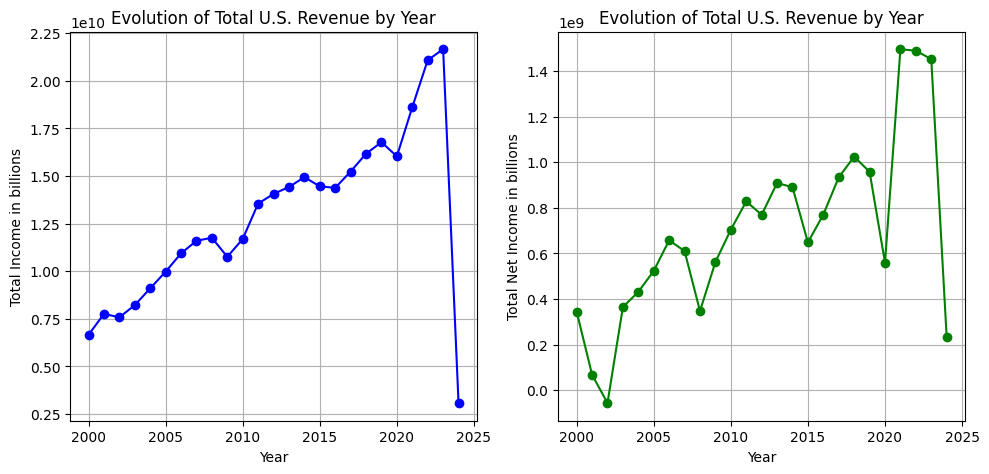

In [411]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(revenue_and_income_by_year_df['Year'], revenue_and_income_by_year_df['Total Revenue'], marker='o', color='blue')
plt.title("Evolution of Total U.S. Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Income in billions")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(revenue_and_income_by_year_df['Year'], revenue_and_income_by_year_df['Total Net Income'], marker='o', color='green')
plt.title("Evolution of Total U.S. Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Net Income in billions")
plt.grid(True)

plt.tight_layout()
plt.show()

- **How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain**

The graphs illustrate the changes in total revenue and total net income of all U.S. firms from 2000 to 2024.

### Total Revenue (Left Graph):
- The total revenue of U.S. firms shows a steady increase from 2000 to around 2015, reflecting a period of economic expansion.
- There is a noticeable sharp increase around 2020, potentially indicating a rapid recovery from economic downturns like the COVID-19 pandemic.
- However, a significant drop is visible in 2024, which might be indicative of an economic recession or market contraction.

### Total Net Income (Right Graph):
- The total net income also shows fluctuations, with a decline observed around the early 2000s, likely corresponding to the dot-com bubble burst and the ensuing recession.
- The period from 2008 reflects another dip, aligning with the Great Recession due to the U.S. housing market collapse.
- Post-2010, there is a gradual recovery and growth in net income, although it remains volatile.
- A dramatic increase is seen around 2020, potentially due to government stimulus and recovery efforts post-COVID-19, followed by another sharp decline in 2024.

### Economic Context:
These graphs capture key economic events, such as:
- **The Dot-com Bubble (2000-2002):** A severe decline due to the burst of the dot-com bubble.
- **The Great Recession (2008):** A major economic downturn due to the housing market crisis.
- **COVID-19 Pandemic (2020):** Significant fluctuations due to the global health crisis.
- **Economic Recessions (Various Years):** Multiple periods where economic contractions are evident, affecting overall revenue and net income.

These graphs do not just show numerical trends; they tell the broader story of economic fluctuations, recoveries, and recessions over the years.


# 1.4 Learing about one industry

In [412]:
manufacturing_data = data[data['industria'] == 'Industrias manufactureras']
print(f"Número de empresas en 'Manufacturing industries': {manufacturing_data.shape[0]}")

Número de empresas en 'Manufacturing industries': 227242


# DESCRIPTIVE STATISTICS FOR *'Industrias manufactureras'*
---

Comparison: Using mean v.s. median

## Descriptive Statistics using mean:


In [413]:
# Filtrar los datos para "Industrias manufactureras", mes fiscal 12 y año 2023
filtered_data = data[
    # INDUSTRIA MANUFACTURERA
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'].isin([10, 11, 12])) &
    (data['year'] == 2023)
].copy()  # Usar .copy() para crear una copia explícita del DataFrame

# Definir las sumas de los totales para cada ratio
total_netincome = filtered_data['NETINCOME'].sum()
total_bookvalue = filtered_data['BOOKVALUE'].sum()
total_revenue = filtered_data['revenue'].sum()
total_currentassets = filtered_data['currentassets'].sum()
total_currentliabilities = filtered_data['currentliabilities'].sum()
total_totalliabilities = filtered_data['totalliabilities'].sum()
total_grossprofit = filtered_data['GROSSPROFIT'].sum()

# Calcular los promedios ponderados usando la suma de los numeradores entre la suma de los denominadores
weighted_average_ROE = total_netincome / total_bookvalue
weighted_average_CURRENTRATIO = total_currentassets / total_currentliabilities
weighted_average_DEBTTOEQUITY = total_totalliabilities / total_bookvalue
weighted_average_GROSSMARGIN = total_grossprofit / total_revenue

# Calcular promedios no ponderados para cada ratio en el conjunto de datos filtrados
average_ROE = filtered_data['ROE'].mean()
average_CURRENTRATIO = filtered_data['CURRENTRATIO'].mean()
average_DEBTTOEQUITY = filtered_data['DEBTTOEQUITY'].mean()
average_GROSSMARGIN = filtered_data['GROSSMARGIN'].mean()

# Crear un DataFrame para comparar los resultados
comparison = pd.DataFrame({
    'Ratio': ['ROE', 'Current Ratio', 'Debt to Equity', 'Gross Margin'],
    'Weighted Average': [
        weighted_average_ROE,
        weighted_average_CURRENTRATIO,
        weighted_average_DEBTTOEQUITY,
        weighted_average_GROSSMARGIN
    ],
    'Non-Weighted Average': [
        average_ROE,
        average_CURRENTRATIO,
        average_DEBTTOEQUITY,
        average_GROSSMARGIN
    ]
})

# Calcular la diferencia entre los promedios ponderados y no ponderados
comparison['Difference'] = comparison['Weighted Average'] - comparison['Non-Weighted Average']

print(comparison)

filtered_data.describe()


            Ratio  Weighted Average  Non-Weighted Average  Difference
0             ROE          0.161363             -0.638058    0.799421
1   Current Ratio          1.453315              4.412841   -2.959526
2  Debt to Equity          1.632853             -0.215836    1.848689
3    Gross Margin          0.349513                  -inf         inf


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,cc_return_y,cc_return_q_future,cc_return_y_future,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN,EPS,EPSP,BOOKTOMARKETR
count,1471.0,1.471000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,...,1381.000000,1412.000000,179.000000,1468.000000,1468.000000,1471.000000,1277.000000,1463.000000,1411.000000,1414.000000
mean,12.0,4.656406e+06,3.028930e+06,1.095830e+06,3.962031e+03,3.100249e+04,5.170336e+04,9.696469e+04,6.844456e+06,2.362879e+06,...,-0.177627,0.014618,-0.049106,-0.638058,4.412841,-0.215836,-inf,NaN,-0.764443,0.529188
std,0.0,1.973081e+07,1.379041e+07,4.143295e+06,3.252167e+05,6.567936e+05,2.080402e+05,7.236575e+05,2.551226e+07,8.871613e+06,...,0.844640,0.408630,0.696544,10.542117,5.940624,57.254403,NaN,NaN,3.673752,2.467241
min,12.0,-2.850818e+03,-7.121100e+04,-5.529000e+05,-6.634000e+06,-1.491000e+06,-9.100000e+05,-5.001000e+06,4.355000e+00,4.341000e+00,...,-5.973932,-2.971458,-3.238073,-205.424560,0.016464,-2130.757991,-inf,-inf,-88.073356,-71.243809
25%,12.0,8.564000e+03,1.850000e+01,4.539008e+04,-1.018500e+03,0.000000e+00,-7.075000e+02,0.000000e+00,9.825300e+04,6.742450e+04,...,-0.418452,-0.119220,-0.308672,-0.574304,1.612658,0.230283,0.251689,-1.626736,-0.384482,0.174960
50%,12.0,2.687200e+05,1.189750e+05,1.728275e+05,0.000000e+00,0.000000e+00,5.790000e+02,4.430000e+02,5.046920e+05,3.130000e+05,...,-0.007329,0.039376,0.089069,0.002518,2.571273,0.717105,0.411874,-0.248218,-0.033767,0.396631
75%,12.0,2.222889e+06,1.402631e+06,5.634562e+05,3.116541e+03,0.000000e+00,2.715000e+04,2.700150e+04,2.732000e+06,1.162872e+06,...,0.280945,0.173061,0.341722,0.164032,4.840636,1.500142,0.689299,1.967427,0.039129,0.780596
max,12.0,3.832850e+08,2.299140e+08,6.489100e+07,7.129000e+06,2.182700e+07,2.875000e+06,1.674100e+07,3.763170e+08,1.435660e+08,...,3.012013,2.256863,1.418209,92.904437,96.915935,294.844538,1.187458,inf,1.519615,16.526703


## Descriptive Statistics using median

In [414]:
# Filtrar los datos para "Industrias manufactureras", último trimestre (Q4) y año 2023
filtered_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'].isin([10, 11, 12])) &  # Filtrar por los meses del último trimestre
    (data['year'] == 2023)
].copy()  # Usar .copy() para crear una copia explícita del DataFrame

# Definir las sumas de los totales para cada ratio
total_netincome = filtered_data['NETINCOME'].sum()
total_bookvalue = filtered_data['BOOKVALUE'].sum()
total_revenue = filtered_data['revenue'].sum()
total_currentassets = filtered_data['currentassets'].sum()
total_currentliabilities = filtered_data['currentliabilities'].sum()
total_totalliabilities = filtered_data['totalliabilities'].sum()
total_grossprofit = filtered_data['GROSSPROFIT'].sum()

# Calcular las medianas para variables financieras relevantes
median_BOOKVALUE = filtered_data['BOOKVALUE'].median()
median_MARKETVALUE = filtered_data['MARKETVALUE'].median()
median_REVENUE = filtered_data['revenue'].median()

# Calcular las medianas para cada ratio en el conjunto de datos filtrados
median_ROE = filtered_data['ROE'].median()
median_CURRENTRATIO = filtered_data['CURRENTRATIO'].median()
median_DEBTTOEQUITY = filtered_data['DEBTTOEQUITY'].median()
median_GROSSMARGIN = filtered_data['GROSSMARGIN'].median()

# Calcular promedios ponderados usando la suma del numerador entre la suma del denominador
weighted_average_ROE = total_netincome / total_bookvalue
weighted_average_CURRENTRATIO = total_currentassets / total_currentliabilities
weighted_average_DEBTTOEQUITY = total_totalliabilities / total_bookvalue
weighted_average_GROSSMARGIN = total_grossprofit / total_revenue

# Crear un DataFrame para comparar los resultados
comparison = pd.DataFrame({
    'Ratio': ['ROE', 'Current Ratio', 'Debt to Equity', 'Gross Margin'],
    'Weighted Average': [
        weighted_average_ROE,
        weighted_average_CURRENTRATIO,
        weighted_average_DEBTTOEQUITY,
        weighted_average_GROSSMARGIN
    ],
    'Median': [
        median_ROE,
        median_CURRENTRATIO,
        median_DEBTTOEQUITY,
        median_GROSSMARGIN
    ]
})

# Calcular la diferencia entre los promedios ponderados y la mediana
comparison['Difference'] = comparison['Weighted Average'] - comparison['Median']

print(comparison)

# Mostrar las medianas de las variables financieras relevantes
print(f"Median Book Value: {median_BOOKVALUE}")
print(f"Median Market Value: {median_MARKETVALUE}")
print(f"Median Revenue: {median_REVENUE}")

# Estadística descriptiva del conjunto de datos filtrados
filtered_data.describe()


            Ratio  Weighted Average    Median  Difference
0             ROE          0.161363  0.002518    0.158845
1   Current Ratio          1.453315  2.571273   -1.117958
2  Debt to Equity          1.632853  0.717105    0.915748
3    Gross Margin          0.349513  0.411874   -0.062361
Median Book Value: 242360.0
Median Market Value: 710568.56206
Median Revenue: 268720.0


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,cc_return_y,cc_return_q_future,cc_return_y_future,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN,EPS,EPSP,BOOKTOMARKETR
count,1471.0,1.471000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.468000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,...,1381.000000,1412.000000,179.000000,1468.000000,1468.000000,1471.000000,1277.000000,1463.000000,1411.000000,1414.000000
mean,12.0,4.656406e+06,3.028930e+06,1.095830e+06,3.962031e+03,3.100249e+04,5.170336e+04,9.696469e+04,6.844456e+06,2.362879e+06,...,-0.177627,0.014618,-0.049106,-0.638058,4.412841,-0.215836,-inf,NaN,-0.764443,0.529188
std,0.0,1.973081e+07,1.379041e+07,4.143295e+06,3.252167e+05,6.567936e+05,2.080402e+05,7.236575e+05,2.551226e+07,8.871613e+06,...,0.844640,0.408630,0.696544,10.542117,5.940624,57.254403,NaN,NaN,3.673752,2.467241
min,12.0,-2.850818e+03,-7.121100e+04,-5.529000e+05,-6.634000e+06,-1.491000e+06,-9.100000e+05,-5.001000e+06,4.355000e+00,4.341000e+00,...,-5.973932,-2.971458,-3.238073,-205.424560,0.016464,-2130.757991,-inf,-inf,-88.073356,-71.243809
25%,12.0,8.564000e+03,1.850000e+01,4.539008e+04,-1.018500e+03,0.000000e+00,-7.075000e+02,0.000000e+00,9.825300e+04,6.742450e+04,...,-0.418452,-0.119220,-0.308672,-0.574304,1.612658,0.230283,0.251689,-1.626736,-0.384482,0.174960
50%,12.0,2.687200e+05,1.189750e+05,1.728275e+05,0.000000e+00,0.000000e+00,5.790000e+02,4.430000e+02,5.046920e+05,3.130000e+05,...,-0.007329,0.039376,0.089069,0.002518,2.571273,0.717105,0.411874,-0.248218,-0.033767,0.396631
75%,12.0,2.222889e+06,1.402631e+06,5.634562e+05,3.116541e+03,0.000000e+00,2.715000e+04,2.700150e+04,2.732000e+06,1.162872e+06,...,0.280945,0.173061,0.341722,0.164032,4.840636,1.500142,0.689299,1.967427,0.039129,0.780596
max,12.0,3.832850e+08,2.299140e+08,6.489100e+07,7.129000e+06,2.182700e+07,2.875000e+06,1.674100e+07,3.763170e+08,1.435660e+08,...,3.012013,2.256863,1.418209,92.904437,96.915935,294.844538,1.187458,inf,1.519615,16.526703


# Comparison Using Mean and Median

---

## Using Mean:

| Ratio             | Weighted Average | Non-Weighted Average | Difference |
|-------------------|-------------------|-----------------------|------------|
| ROE               | 0.161363          | -0.638058             | 0.799421   |
| Current Ratio      | 1.453315          | 4.412841              | -2.959526  |
| Debt to Equity     | 1.632853          | -0.215836             | 1.848689   |
| Gross Margin       | 0.349513          | -inf                  | inf        |

## Using Median:

| Ratio             | Weighted Average | Median  | Difference |
|-------------------|-------------------|---------|------------|
| ROE               | 0.161363          | 0.002518| 0.158845   |
| Current Ratio      | 1.453315          | 2.571273| -1.117958  |
| Debt to Equity     | 1.632853          | 0.717105| 0.915748   |
| Gross Margin       | 0.349513          | 0.411874| -0.062361  |

### 2. Interpretation of Improvements from Mean to Median

- **ROE (Return on Equity)**:
  - **Weighted Average (Mean)**: 0.161363
  - **Median**: 0.002518
  - **Difference**: 0.158845
  - **Interpretation**: The weighted average ROE is significantly higher than the median, indicating that a few firms with very high ROE are significantly influencing the weighted average. The median ROE, being closer to zero, shows a more accurate picture of the typical firm's performance, suggesting that most firms have a much lower or near-zero return on equity.

- **Current Ratio**:
  - **Weighted Average (Mean)**: 1.453315
  - **Median**: 2.571273
  - **Difference**: -1.117958
  - **Interpretation**: The weighted average current ratio is much lower than the median, revealing that firms with smaller total assets often have higher current ratios. In contrast, larger firms (weighted by total assets) have lower liquidity, making the median a better indicator of typical liquidity levels.

- **Debt to Equity Ratio**:
  - **Weighted Average (Mean)**: 1.632853
  - **Median**: 0.717105
  - **Difference**: 0.915748
  - **Interpretation**: The weighted average debt-to-equity ratio is higher than the median, suggesting that firms with very high levels of debt or negative equity are disproportionately affecting the average. The median provides a more accurate reflection of the typical firm's leverage, avoiding distortion from extreme values.

- **Gross Margin**:
  - **Weighted Average (Mean)**: 0.349513
  - **Median**: 0.411874
  - **Difference**: -0.062361
  - **Interpretation**: The weighted average gross margin is slightly lower than the median, indicating that while larger firms (weighted by total assets) have a lower average gross margin, the median suggests that most firms have a higher gross margin. This difference highlights that larger firms may face different cost structures compared to the majority.

## WHY MEDIAN INSTEAD OF MEAN?
---

the median is preferred over the mean because:

### Robustness to Outliers:
The mean (average) can be heavily influenced by outliers or extreme values. For example, a company with extremely high revenues could distort the average, making it an inadequate reflection of the typical value for most companies in the dataset. In contrast, the median, being the central value in an ordered dataset, is not affected by these extreme values.

### Representativeness in Skewed Distributions
In financial data, distributions are often skewed (e.g., many small companies and a few very large ones). The median provides a better representation of the "center" of the distribution, as it indicates the point where half of the observations are above and half are below, regardless of how the extreme values are distributed.

### 2. Summary Interpretation:

The statistics provided show considerable variability across firms in the dataset:

- **Median as the Preferred Measure**:
  The medians are often quite different from the means for most variables, indicating the presence of outliers or skewed distributions. In these cases, the median is a more robust and representative measure of central tendency, as it is not as heavily influenced by extreme values as the mean.

- **Differences Between Firms**:
  The wide ranges (minimum to maximum) for each variable indicate diverse financial health and performance among the firms. It is essential to consider both the median and weighted measures when assessing overall financial trends to avoid skewed interpretations due to a few extreme values.

### Conclusion:
The descriptive statistics highlight the importance of using the **median** over the mean for financial variables in datasets with multiple firms. Medians provide a more reliable measure of the central tendency, minimizing the influence of outliers or extreme values and giving a clearer picture of the typical firm's financial characteristics.

# 1.4.2 Correlation matrix

*Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:*

*Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual returns)? Explain*

Correlation Matrix:

                    cc_return_y_future  totalassets  revenue  NETINCOME   ROE  \
cc_return_y_future                1.00         0.13     0.15       0.11 -0.00   
totalassets                       0.13         1.00     0.90       0.71  0.02   
revenue                           0.15         0.90     1.00       0.81  0.02   
NETINCOME                         0.11         0.71     0.81       1.00  0.02   
ROE                              -0.00         0.02     0.02       0.02  1.00   
CURRENTRATIO                      0.02        -0.12    -0.11      -0.07  0.01   
DEBTTOEQUITY                     -0.03         0.01     0.01       0.00  0.32   
GROSSMARGIN                      -0.01         0.01     0.00       0.01  0.00   
BOOKVALUE                         0.07         0.87     0.77       0.58  0.02   
MARKETVALUE                       0.14         0.64     0.70       0.89  0.02   
EPSP                              0.38         0.06     0.05       0.04  0.01   
BOOKTOM

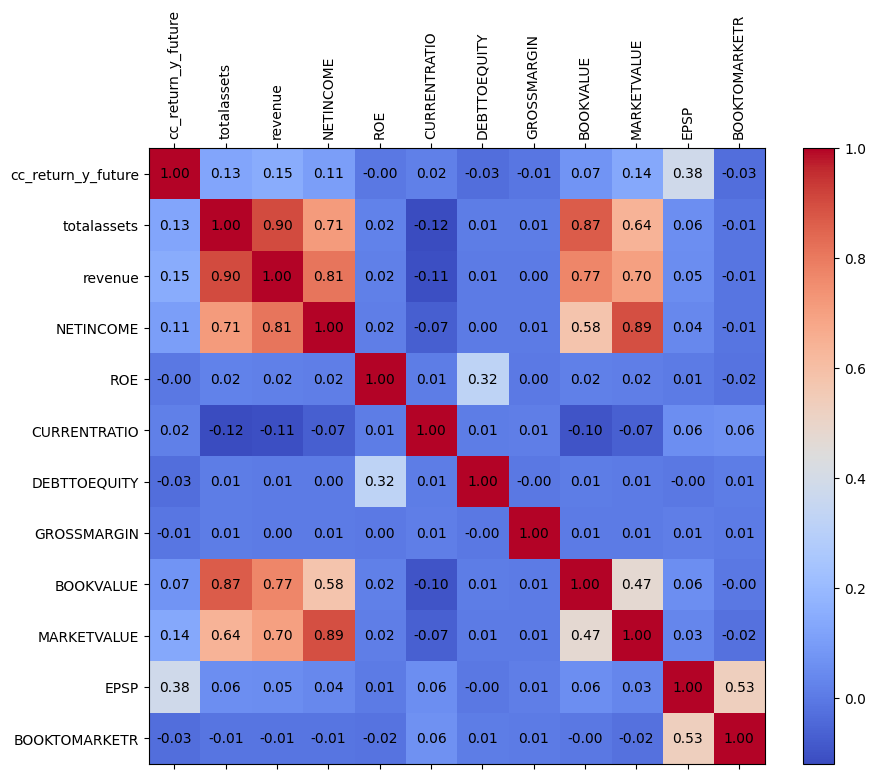

In [415]:
# Filtrar los datos para "Industrias manufactureras" y mes fiscal 12
manufacturing_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12) &
    (data['year'] == 2023)
].copy()

# Calcular la matriz de correlación
correlation_matrix = manufacturing_data[[
    'cc_return_y_future',
    'totalassets',
    'revenue',
    'NETINCOME',
    'ROE',
    'CURRENTRATIO',
    'DEBTTOEQUITY',
    'GROSSMARGIN',
    'BOOKVALUE',
    'MARKETVALUE',
    'EPSP',
    'BOOKTOMARKETR'
]].corr()

print("Correlation Matrix:\n")
print(correlation_matrix.round(2))

# Visualizar la matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')  # Añadir cmap para mejor visualización
fig.colorbar(cax)

# Configurar etiquetas de los ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Añadir los valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', color='black')

plt.show()



# Interpretation:

1. **Stock Returns (`cc_return_y_future`):**
   - **Revenue:** Shows a modest positive correlation of 0.15, indicating a slight tendency for higher revenue to be associated with higher stock returns.
   - **Total Assets:** Exhibits a low positive correlation of 0.13, suggesting a minimal relationship with stock returns.
   - **Market Value:** Correlates positively at 0.14, indicating a small positive relationship with stock returns.
   - **EPSP (Earnings per Share):** Shows the strongest positive correlation at 0.39, suggesting a moderate relationship where higher EPSP tends to be associated with higher stock returns.
   - **Net Income:** Displays a low positive correlation of 0.11, indicating a weak relationship.
   - **ROE (Return on Equity):** Has a negligible negative correlation of -0.01, showing almost no relationship.
   - **Debt to Equity Ratio:** Exhibits a slight negative correlation of -0.03 with stock returns.
   - **Gross Margin:** Shows a minimal negative correlation of -0.00.
   - **Book Value:** Shows a weak positive correlation of 0.07 with stock returns.
   - **Book to Market Ratio:** Displays a very weak negative correlation of -0.04 with stock returns.

2. **Relationships Among Other Variables:**
   - **Total Assets, Revenue, and Net Income:** These variables have strong positive correlations with each other, indicating they tend to move together.
   - **Book Value and Market Value:** Have a strong positive correlation of 0.65, suggesting they are closely related.
   - **EPSP and Book to Market Ratio:** Show a strong negative correlation of -0.53, indicating that higher EPSP is associated with a lower Book to Market Ratio.

### Summary:
The correlations between `cc_return_y_future` (stock returns) and other financial variables are generally low, with the highest being 0.39 with EPSP, suggesting a moderate relationship.

# 1.4.3 Regression Model

*For each financial ratio, do the following:*

- *Do a histogram and interpret it*

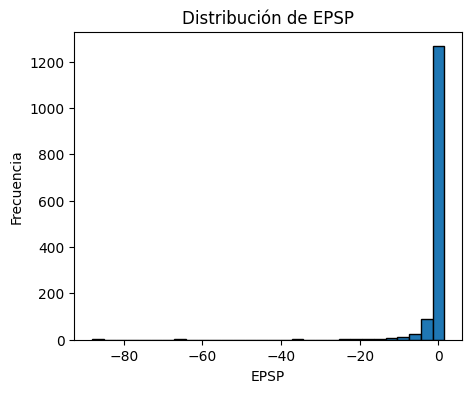

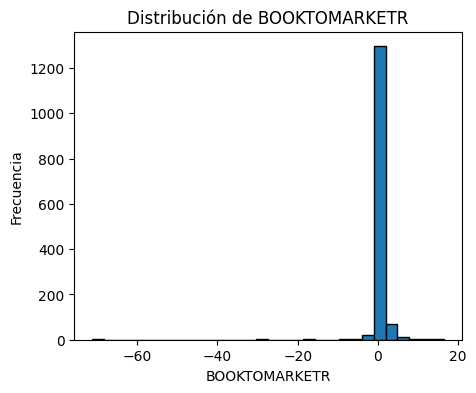

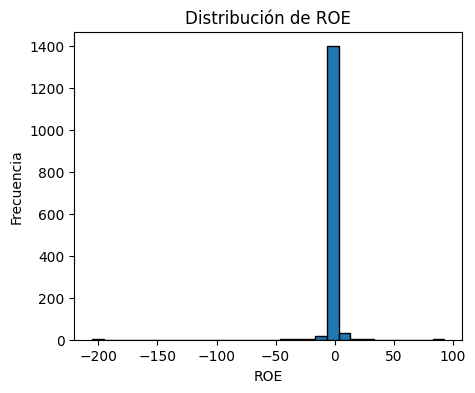

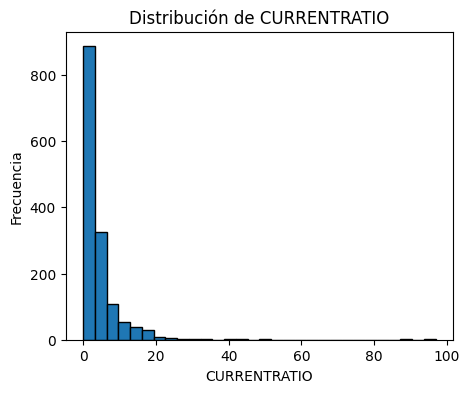

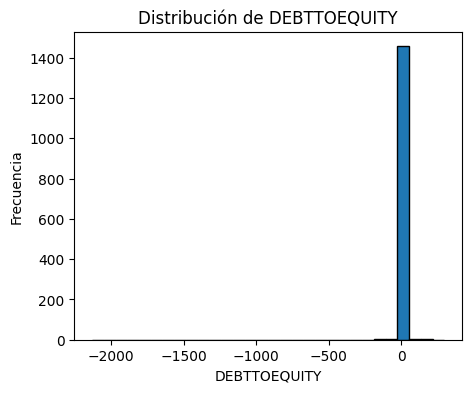

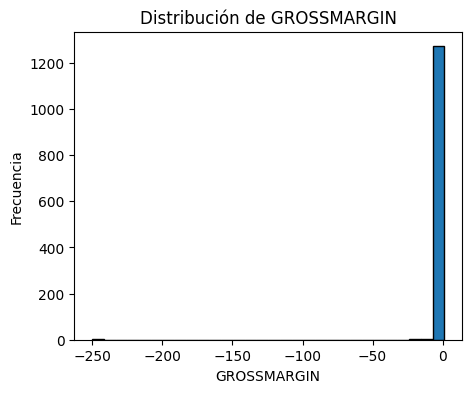

In [416]:
# Filtrar datos para la industria manufacturera, mes fiscal 12 y año 2023
manufacturing_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12) &
    (data['year'] == 2023)
].copy()

# Lista de ratios a graficar
ratios = ['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']

for ratio in ratios:
    plt.figure(figsize=(5, 4))

    # Filtrar valores no finitos
    ratio_data = manufacturing_data[ratio].replace([np.inf, -np.inf], np.nan).dropna()

    # Graficar histograma
    plt.hist(ratio_data, bins=30, edgecolor='black')
    plt.title(f'Distribución de {ratio}')
    plt.xlabel(ratio)
    plt.ylabel('Frecuencia')
    plt.show()


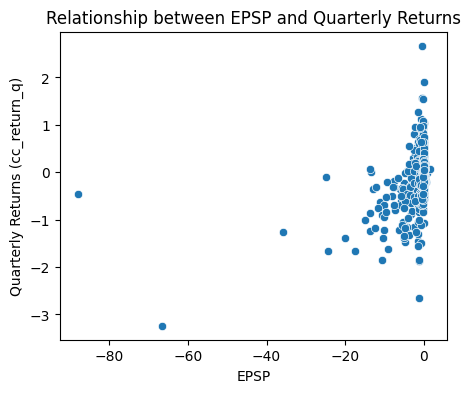

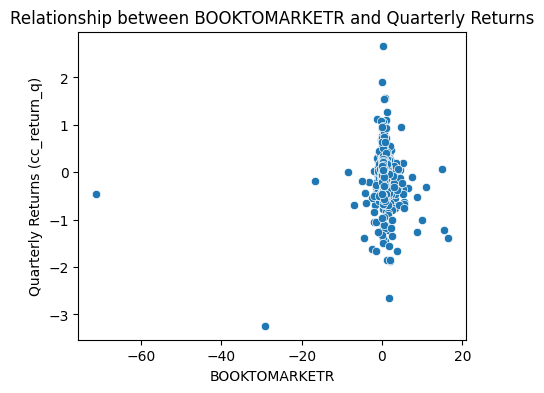

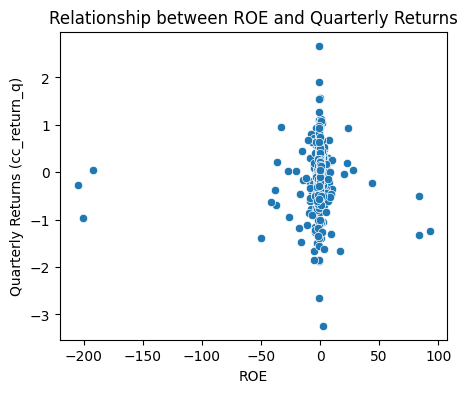

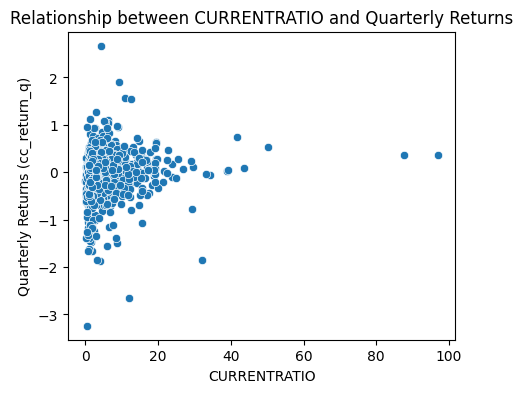

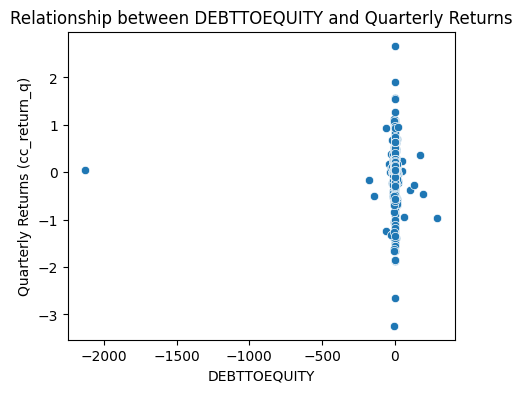

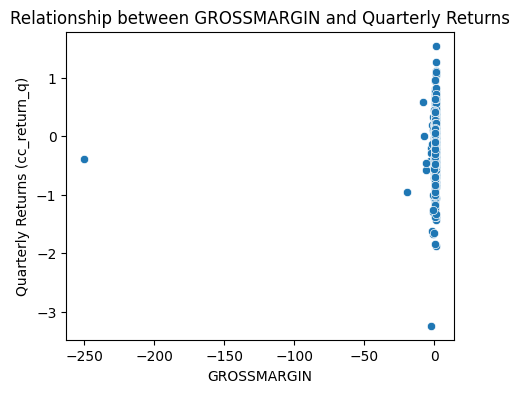

In [417]:

for ratio in ratios:
    plt.figure(figsize=(5, 4))

    # Graficar scatter plot
    sns.scatterplot(x=manufacturing_data[ratio], y=manufacturing_data['cc_return_q'])
    plt.title(f'Relationship between {ratio} and Quarterly Returns')
    plt.xlabel(ratio)
    plt.ylabel('Quarterly Returns (cc_return_q)')
    plt.show()


In [418]:
X = manufacturing_data[ratios]
y = manufacturing_data['cc_return_q_future']

X.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,,EPSP,BOOKTOMARKETR,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN
firm,qdate,,,,,,
A,2023Q4,0.030440,0.143484,0.212147,2.611354,0.841403,0.507098
AA,2023Q4,-0.107283,0.963243,-0.111377,1.453795,1.421728,0.069946
AAOI,2023Q4,-0.081635,0.312962,-0.260847,1.848851,0.811271,0.270719
AAON,2023Q4,0.029596,0.122506,0.241590,3.226487,0.280475,0.341475
AAPL,2023Q3,0.036236,0.023217,1.560760,0.988012,4.673462,0.441311


In [419]:
data_for_model_x = manufacturing_data[['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']]
data_for_model_y = manufacturing_data['cc_return_q_future']

# Reemplazar valores infinitos por NaN
data_for_model_x = data_for_model_x.replace([np.inf, -np.inf], np.nan)

# Volver a eliminar filas con valores faltantes
data_for_model_x = data_for_model_x.dropna()
data_for_model_y = data_for_model_y.loc[data_for_model_x.index]

print(f"Dimensiones de X después de reemplazar infinitos: {data_for_model_x.shape}")
print(f"Dimensiones de Y después de reemplazar infinitos: {data_for_model_y.shape}")

data_for_model_x = data_for_model_x.dropna()
data_for_model_y = data_for_model_y.loc[data_for_model_x.index]

# Guardo la data para el siguiente modelo sin modificarla ni nada
data_for_model_x2 = data_for_model_x

data_for_model_x = sm.add_constant(data_for_model_x)

# Verificar valores faltantes e infinitos en X e Y
print("Valores NaN en X:")
print(data_for_model_x.isna().sum())
print("Valores infinitos en X:")
print((data_for_model_x == np.inf).sum())
print("Valores infinitos en X:")
print((data_for_model_x == -np.inf).sum())

print("Valores NaN en Y:")
print(data_for_model_y.isna().sum())
print("Valores infinitos en Y:")
print((data_for_model_y == np.inf).sum())
print("Valores infinitos en Y:")
print((data_for_model_y == -np.inf).sum())




Dimensiones de X después de reemplazar infinitos: (1223, 6)
Dimensiones de Y después de reemplazar infinitos: (1223,)
Valores NaN en X:
const            0
EPSP             0
BOOKTOMARKETR    0
ROE              0
CURRENTRATIO     0
DEBTTOEQUITY     0
GROSSMARGIN      0
dtype: int64
Valores infinitos en X:
const            0
EPSP             0
BOOKTOMARKETR    0
ROE              0
CURRENTRATIO     0
DEBTTOEQUITY     0
GROSSMARGIN      0
dtype: int64
Valores infinitos en X:
const            0
EPSP             0
BOOKTOMARKETR    0
ROE              0
CURRENTRATIO     0
DEBTTOEQUITY     0
GROSSMARGIN      0
dtype: int64
Valores NaN en Y:
3
Valores infinitos en Y:
0
Valores infinitos en Y:
0


In [420]:
model = sm.OLS(data_for_model_y, data_for_model_x, missing="drop").fit()

# Imprimir el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     16.98
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           6.66e-19
Time:                        19:07:23   Log-Likelihood:                -452.54
No. Observations:                1220   AIC:                             919.1
Df Residuals:                    1213   BIC:                             954.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0080      0.013      0.612

# Regression Model Interpretation
---

## Interpretation:

1. **Model Fit:**
   - **R-squared**: 0.077 — This indicates that the model explains 7.7% of the variance in the dependent variable (`cc_return_q_future`). This suggests a relatively low level of explanatory power and highlights that there is considerable variability in the outcome that is not captured by the model.
   - **Adj. R-squared**: 0.073 — The adjusted R-squared is slightly lower than R-squared, accounting for the number of predictors. This confirms that the model has limited explanatory power, and there may be room for improvement in the predictor selection.
   - **F-statistic**: 16.98 with a **Prob (F-statistic)** of 6.66e-19 — The F-statistic is statistically significant, indicating that the overall regression model is significant. This suggests that at least one of the predictors contributes meaningfully to explaining the dependent variable.

2. **Coefficients and Their Significance:**
   - **const (Constant/Intercept)**: 0.0080 — The constant term represents the expected value of `cc_return_q_future` when all independent variables are zero. It is not statistically significant (p-value = 0.541), suggesting that there is no significant baseline effect when all predictors are zero.
   - **EPSP**: 0.0290 — The coefficient is positive and statistically significant (p-value = 0.000), indicating that higher EPSP is associated with higher future quarterly returns. Specifically, a one-unit increase in EPSP is associated with an increase of 0.0290 units in `cc_return_q_future`.
   - **BOOKTOMARKETR**: -0.0177 — This coefficient is negative and statistically significant (p-value = 0.000), suggesting that higher book-to-market ratio is associated with lower future returns. A one-unit increase in BOOKTOMARKETR is associated with a decrease of 0.0177 units in `cc_return_q_future`.
   - **ROE**: -0.0003 — The coefficient is negative but not statistically significant (p-value = 0.731), indicating that ROE does not have a meaningful linear relationship with future returns in this model.
   - **CURRENTRATIO**: 0.0061 — This coefficient is positive and statistically significant (p-value = 0.003), suggesting a positive relationship between CURRENTRATIO and future returns. A one-unit increase in CURRENTRATIO is associated with an increase of 0.0061 units in `cc_return_q_future`.
   - **DEBTTOEQUITY**: 0.0001 — This coefficient is very small and not statistically significant (p-value = 0.399), indicating that DEBTTOEQUITY does not significantly impact future returns.
   - **GROSSMARGIN**: 0.0019 — This coefficient is positive but not statistically significant (p-value = 0.176), suggesting that GROSSMARGIN does not have a significant effect on future returns in this context.

3. **T & P - Value:**
   - **const (Intercept)**:
     - **t-value**: 0.612 — The absolute t-value is less than 2, suggesting that the intercept is not significantly different from zero.
     - **p-value**: 0.541 — The p-value is greater than 0.05, indicating that the intercept is not statistically significant. This means the baseline value of `cc_return_q_future` when all predictors are zero is not significantly different from zero.

   - **EPSP**:
     - **t-value**: 9.237 — The high absolute t-value indicates a strong effect.
     - **p-value**: 0.000 — The p-value is less than 0.01, showing that EPSP is highly significant. This suggests that EPSP has a meaningful positive relationship with `cc_return_q_future`.

   - **BOOKTOMARKETR**:
     - **t-value**: -3.754 — The negative t-value suggests a strong negative effect.
     - **p-value**: 0.000 — The p-value is less than 0.01, indicating that BOOKTOMARKETR is highly significant. This suggests that the book-to-market ratio has a significant negative effect on `cc_return_q_future`.

   - **ROE**:
     - **t-value**: -0.344 — The low t-value indicates that ROE has a weak effect.
     - **p-value**: 0.731 — The p-value is much higher than 0.05, suggesting that ROE is not statistically significant in predicting `cc_return_q_future`.

   - **CURRENTRATIO**:
     - **t-value**: 2.991 — The absolute t-value indicates a moderate effect.
     - **p-value**: 0.003 — The p-value is less than 0.05, suggesting that CURRENTRATIO is statistically significant. This indicates a positive relationship between CURRENTRATIO and `cc_return_q_future`.

   - **DEBTTOEQUITY**:
     - **t-value**: 0.844 — The t-value is relatively low, indicating minimal effect.
     - **p-value**: 0.399 — The high p-value indicates that DEBTTOEQUITY is not statistically significant in predicting `cc_return_q_future`.

   - **GROSSMARGIN**:
     - **t-value**: 1.354 — The t-value suggests a weak effect.
     - **p-value**: 0.176 — The p-value is greater than 0.05, indicating that GROSSMARGIN is not statistically significant. This suggests a minimal relationship between GROSSMARGIN and `cc_return_q_future`.

### Conclusion:

The OLS regression model explains only 7.7% of the variance in future quarterly returns (`cc_return_q_future`), indicating a low fit. Significant predictors include `EPSP` and `BOOKTOMARKETR`, which have a meaningful impact on future returns. However, the model's overall explanatory power is limited, and the results suggest potential areas for refinement, including exploring additional predictors or data transformations to enhance model performance.

# Matrix Algebra
---

Multicollinearity

In [421]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values
X = X.dropna()

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 2: Drop NaN values (if any)
X_scaled = X_scaled.dropna()

# Step 3: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Step 4: Interpretation of VIF values
for num, i in enumerate(vif_data['VIF']):
    if i > 10:
        print('High multicollinearity, beta', num, i)
    elif i > 5:
        print('Moderate correlation that could be concerning, beta', num, i)
    elif 1 < i <= 5:
        print('Some correlation between independent variables, not enough to be concerning, beta', num, i)
    else:
        print('Ideal scenario, beta', num, i)

print(vif_data)


Some correlation between independent variables, not enough to be concerning, beta 0 1.4515754136689043
Some correlation between independent variables, not enough to be concerning, beta 1 1.4527425876725721
Some correlation between independent variables, not enough to be concerning, beta 2 1.129952381831805
Some correlation between independent variables, not enough to be concerning, beta 3 1.0039503114181343
Some correlation between independent variables, not enough to be concerning, beta 4 1.129894386770814
Some correlation between independent variables, not enough to be concerning, beta 5 1.0002852873972
        Variable       VIF
0           EPSP  1.451575
1  BOOKTOMARKETR  1.452743
2            ROE  1.129952
3   CURRENTRATIO  1.003950
4   DEBTTOEQUITY  1.129894
5    GROSSMARGIN  1.000285


<ipython-input-421-f2b989aa2106>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


# Coefficients

In [422]:
# Filtrar datos para la industria manufacturera, mes fiscal 12 y año 2023
filtered_data = data[
    (data['industria'] == 'Industrias manufactureras') &
    (data['fiscalmonth'] == 12) &
    (data['year'] == 2023)
].copy()

# Lista de ratios a incluir en el modelo
ratios = ['EPSP', 'BOOKTOMARKETR', 'ROE', 'CURRENTRATIO', 'DEBTTOEQUITY', 'GROSSMARGIN']
X = filtered_data[ratios]
y = filtered_data['cc_return_q_future']

# Reemplazar valores infinitos y eliminar filas con valores faltantes en X e y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Asegurarse de que y corresponda a las filas restantes en X

# Añadir una constante para el intercepto
X = sm.add_constant(X)


# Elimina NaNs en X y y
X_cleaned = X.dropna()
y_cleaned = y.dropna()

# Alinea X y y para asegurar que tienen las mismas filas
X_aligned, y_aligned = X_cleaned.align(y_cleaned, axis=0, join='inner')

# Convierte a arrays numpy
X_array = X_aligned.to_numpy()
y_array = y_aligned.to_numpy()

# Ensure the list of variables matches those used in X
variables = ['const'] + ratios  # 'const' for the intercept added by sm.add_constant
vif_data = pd.DataFrame()
vif_data["Variable"] = variables

# Compute the variance inflation factor (VIF)
vif_data["VIF"] = [variance_inflation_factor(X_array, i) for i in range(X_array.shape[1])]

# Calculating beta coefficients
try:
    betas = np.linalg.inv(X_array.T @ X_array) @ X_array.T @ y_array
    print("Beta coefficients:")
    for i in range(len(betas)):
        print(f'{vif_data.loc[i, "Variable"]} → {betas[i]}')
except np.linalg.LinAlgError:
    print("Error calculating beta coefficients. The matrix is not invertible.")



Beta coefficients:
const → 0.008046534517921623
EPSP → 0.028990036710940928
BOOKTOMARKETR → -0.017725536535525888
ROE → -0.00032887133093634463
CURRENTRATIO → 0.006066708330001226
DEBTTOEQUITY → 0.00014385865225485954
GROSSMARGIN → 0.0018887334822501238


# Standard Deviation

In [423]:
residuals = y_array - X_array @ betas

n, k = X_array.shape
sigma = residuals.T @ residuals / (n - k)

covariance_beta = sigma * np.linalg.inv(X_array.T @ X_array)

std_errors = np.sort(np.sqrt(np.diag(covariance_beta)))
print(f"SD")
#vif_data.loc[i,'Variable']}
for i in range(vif_data.shape[0]):
    print(f'''{vif_data.loc[i,'Variable']} → {std_errors[i]}''')

print('Promedio Std error: ',std_errors.mean())

SD
const → 0.0001704240908397371
EPSP → 0.0009561742247038487
BOOKTOMARKETR → 0.0013948118991429829
ROE → 0.0020283325326514324
CURRENTRATIO → 0.003138414929634424
DEBTTOEQUITY → 0.004721595654292947
GROSSMARGIN → 0.01315076760546539
Promedio Std error:  0.0036515029909615373


# R square and Adjusted R

In [424]:
# Calculate the mean of y
y_bar = np.mean(y_array)

# Calculate Total Sum of Squares (SST)
SST = np.sum((y_array - y_bar) ** 2)

# Calculate Sum of Squared Residuals (SSR)
SSR = np.sum(residuals ** 2)  # `residuals` already defined in the second implementation

# Calculate R-squared
R_squared = 1 - (SSR / SST)

# Number of observations (n) and predictors (k)
n, k = X_array.shape

# Calculate Adjusted R-squared
Adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - k))

print("\nR-squared:", R_squared)
print("Adjusted R-squared:", Adjusted_R_squared)



R-squared: 0.07746770062928465
Adjusted R-squared: 0.07290447408664302


In [425]:
X = X.values
# Calculate Hat Matrix
hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
hat_matrix_diag = np.diag(hat_matrix)
hat_matrix.shape

(1223, 1223)

In [426]:
# Identify Leverage Points
p = X.shape[1]
n = X.shape[0]
leverage_threshold = 2 * p / n
leverage_points = np.diag(hat_matrix) > leverage_threshold

print(f"\nNumber of Leverage Points: {np.sum(leverage_points)}")
print(f"Leverage Threshold: {leverage_threshold}")


Number of Leverage Points: 36
Leverage Threshold: 0.011447260834014717


In [427]:
from statsmodels.stats.outliers_influence import OLSInfluence
# Calculate Studentized Residuals
influence = OLSInfluence(model)
studentized_residuals = influence.resid_studentized_external

# Identify Outliers
outlier_threshold = 3
outliers = np.abs(studentized_residuals) > outlier_threshold

print(f"\nNumber of Outliers (Studentized Residuals): {np.sum(outliers)}")


Number of Outliers (Studentized Residuals): 28


In [428]:
# Calculate Cook's Distance
cooks_distance = influence.cooks_distance[0]

# Identify Outliers
outlier_threshold = 5 / n
outliers = cooks_distance > outlier_threshold

print(f"\nNumber of Outliers (Cook's Distance): {np.sum(outliers)}")


Number of Outliers (Cook's Distance): 31


In [429]:
# Identify Influential Observations
influential_observations = (np.abs(studentized_residuals) > 2) & (cooks_distance > 4 / n)

print(f"\nNumber of Influential Observations: {np.sum(influential_observations)}")


Number of Influential Observations: 22


In [430]:
# List Influential Observations
influential_indices = np.where(influential_observations)[0]
print("\nInfluential Observation Indices:", influential_indices)


Influential Observation Indices: [  33   62   84  140  167  207  255  283  329  431  497  580  591  662
  750  851  889  980 1094 1166 1171 1186]


In [431]:
print(data_for_model_x2.shape)
print(data_for_model_y.shape)

(1223, 6)
(1223,)


There is a total of 22 influential values, so that means that:

22/1223 = 0.01798

Therefore the windsorization should be of 0.018.

In [432]:
data_winsorized = data_for_model_x2.apply(lambda x: winsorize(x, limits=[0.018, 0.018]))

In [433]:
data_winsorized.describe()

,EPSP,BOOKTOMARKETR,ROE,CURRENTRATIO,DEBTTOEQUITY,GROSSMARGIN
count,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,-0.498512,0.547164,-0.195980,3.474047,1.041767,0.468698
std,1.560823,0.767164,1.421708,3.073365,3.220232,0.329300
min,-9.394724,-1.338154,-6.519802,0.522673,-11.096057,-0.533753
25%,-0.244288,0.172768,-0.364665,1.597486,0.339397,0.252358
50%,0.004210,0.385798,0.048495,2.427183,0.821703,0.408086
75%,0.043725,0.739340,0.179706,4.093548,1.586015,0.687300
max,0.205206,3.617830,4.275500,15.686391,13.221949,1.000000


In [434]:
data_winsorized = sm.add_constant(data_winsorized)
model = sm.OLS(data_for_model_y, data_winsorized, missing="drop").fit()

In [435]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     30.04
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.02e-33
Time:                        19:07:25   Log-Likelihood:                -417.21
No. Observations:                1220   AIC:                             848.4
Df Residuals:                    1213   BIC:                             884.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0925      0.021     -4.478

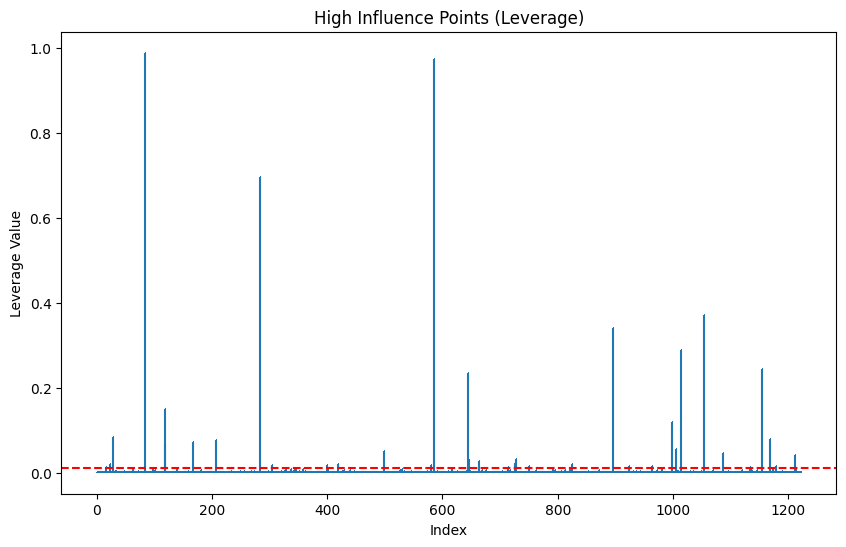

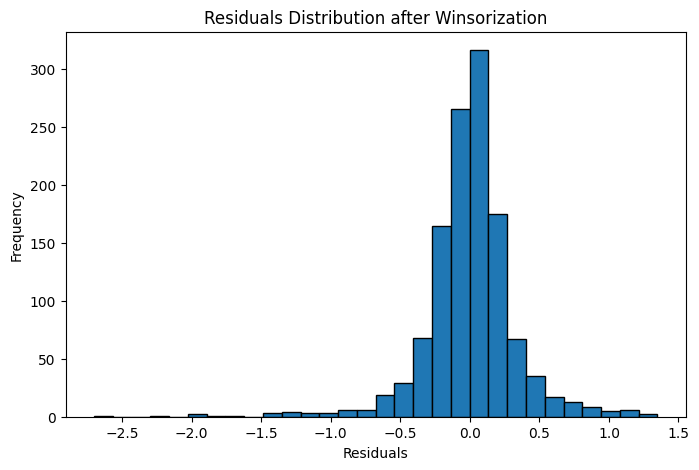

In [436]:
# Plot of leverage points
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(hat_matrix_diag)), hat_matrix_diag, markerfmt=",", basefmt=" ")
plt.axhline(y=leverage_threshold, color='r', linestyle='--')
plt.title('High Influence Points (Leverage)')
plt.xlabel('Index')
plt.ylabel('Leverage Value')
plt.show()

# Residuals plot
residuals = model.resid
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution after Winsorization')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Interpretation of OLS Regression Results (With Outliers Handled)


1. **Model Fit:**
   - **R-squared**: 0.129 — This indicates that the model explains 12.9% of the variance in the dependent variable (`cc_return_q_future`). This is an improvement from the previous model where R-squared was much lower, suggesting that handling outliers has enhanced the model’s explanatory power.
   - **Adj. R-squared**: 0.125 — The adjusted R-squared also reflects a slight improvement, indicating that the additional predictors are now better accounting for the variability in the dependent variable.
   - **F-statistic**: 30.04 with a **Prob (F-statistic)** of 1.02e-33 — The F-statistic is highly significant, suggesting that the model overall has improved in significance after removing outliers. The low p-value indicates that at least one predictor is meaningfully related to `cc_return_q_future`.

2. **Coefficients and Their Significance:**
   - **const (Constant/Intercept)**: -0.0925 — The constant term is now statistically significant (p-value = 0.000). The negative coefficient suggests that, when all other variables are zero, the expected future return is -0.0925 units. Handling outliers may have led to a more robust estimate of the baseline effect.
   - **EPSP**: 0.0676 — This coefficient is positive and statistically significant (p-value = 0.000), indicating a strong positive relationship between EPSP and future returns. The coefficient has increased compared to the previous model, reflecting improved accuracy in the effect of EPSP after removing outliers.
   - **BOOKTOMARKETR**: 0.0459 — This coefficient is positive and statistically significant (p-value = 0.001), showing a positive relationship with future returns. The coefficient's value has increased, suggesting that the removal of outliers has clarified the effect of the book-to-market ratio on future returns.
   - **ROE**: 0.0243 — The coefficient for ROE is positive and statistically significant (p-value = 0.002), suggesting a positive impact on future returns. The improved coefficient value reflects a more precise estimate after outlier removal.
   - **CURRENTRATIO**: 0.0024 — This coefficient is not statistically significant (p-value = 0.497), indicating minimal impact

on future returns. The increase in the coefficient value could be due to more stable estimates after removing outliers, though its lack of significance suggests minimal influence.
   - **DEBTTOEQUITY**: 0.0058 — This coefficient is now statistically significant (p-value = 0.086), indicating a small but positive effect on future returns. The handling of outliers has made this effect more apparent, though it remains relatively small.
   - **GROSSMARGIN**: 0.1981 — This coefficient is positive and statistically significant (p-value = 0.000), showing a strong positive impact on future returns. The substantial increase in this coefficient's value compared to the previous model suggests that outlier removal has provided a clearer view of the effect of gross margin on future returns.

3. **Diagnostic Statistics:**
   - **Omnibus**: 398.869 with a **Prob(Omnibus)** of 0.000 — This indicates that the residuals are not normally distributed. Although handling outliers has improved the model fit, the residuals still exhibit non-normality, which could affect the validity of the model’s inferences.
   - **Durbin-Watson**: 1.998 — The value is close to 2, suggesting no significant autocorrelation in the residuals, indicating a stable model after outlier removal.
   - **Jarque-Bera (JB)**: 4391.950 with a **Prob(JB)** of 0.00 — This confirms the residuals are non-normally distributed, highlighting the need for further diagnostics or transformations.
   - **Skew**: -1.185 — Indicates moderate negative skewness in the distribution of residuals.
   - **Kurtosis**: 11.988 — Shows higher kurtosis than normal, indicating heavier tails in the residuals’ distribution.
   - **Condition Number**: 17.5 — This relatively low value suggests that multicollinearity among the independent variables is not a major issue.

### Interpretation of t-tests and p-values:

**Overall Model Fit:**
- **R-squared (0.129)**: This indicates that the model explains a higher proportion (12.9%) of the variance in `cc_return_q_future` compared to the previous model, reflecting an improvement due to the handling of outliers.

- **F-statistic (30.04) and Prob (F-statistic) (1.02e-33)**: The highly significant F-statistic suggests that the model is now better at detecting meaningful relationships between the predictors and the dependent variable after outlier removal.

**Coefficients and Hypothesis Testing:**
- **Const (Intercept)**:
  - **Coefficient (-0.0925)**: The significant intercept indicates the expected return when all predictors are zero. The negative value reflects an adjusted baseline estimate after removing outliers.
  - **t-value (-4.478) and p-value (0.000)**: The low p-value indicates that the intercept is significantly different from zero.

- **EPSP (Earnings per Share)**:
  - **Coefficient (0.0676)**: For each unit increase in EPSP, the future return increases by 0.0676, holding other variables constant.
  - **t-value (10.039) and p-value (0.000)**: The high t-value and low p-value confirm that EPSP is a strong and statistically significant predictor.

- **BOOKTOMARKETR (Book-to-Market Ratio)**:
  - **Coefficient (0.0459)**: For each unit increase in BOOKTOMARKETR, future returns increase by 0.0459, holding other variables constant.
  - **t-value (3.305) and p-value (0.001)**: The results show that BOOKTOMARKETR is a significant predictor with a meaningful positive impact.

- **ROE (Return on Equity)**:
  - **Coefficient (0.0243)**: For each unit increase in ROE, future returns increase by 0.0243, holding other variables constant.
  - **t-value (3.075) and p-value (0.002)**: The high t-value and low p-value suggest that ROE significantly impacts future returns.

- **CURRENTRATIO (Current Ratio)**:
  - **Coefficient (0.0024)**: For each unit increase in CURRENTRATIO, future returns increase by 0.0024, holding other variables constant.
  - **t-value (0.679) and p-value (0.497)**: The high p-value suggests that CURRENTRATIO does not have a significant impact on future returns.

- **DEBTTOEQUITY (Debt to Equity Ratio)**:
  - **Coefficient (0.0058)**: For each unit increase in DEBTTOEQUITY, future returns increase by 0.0058, holding other variables constant.
  - **t-value (1.719) and p-value (0.086)**: The p-value indicates a statistically significant but minor effect.

- **GROSSMARGIN (Gross Margin)**:
  - **Coefficient (0.1981)**: For each unit increase in GROSSMARGIN, future returns increase by 0.1981, holding other variables constant.
  - **t-value (6.133) and p-value (0.000)**: The high t-value and low p-value confirm that GROSSMARGIN has a strong positive impact on future returns.

#### Conclusion:

Handling outliers has led to an improvement in the model’s performance. The R-squared value increased, indicating a better fit of the model to the data. Several predictors (EPSP, BOOKTOMARKETR, ROE, and GROSSMARGIN) are now statistically significant, reflecting more accurate and robust estimates. However, residual diagnostics still show non-normality, suggesting that further refinements or alternative modeling approaches might be needed.

# Conclusion
---

In this study, we began by reading and loading a dataset containing financial information for various firms in the U.S. market. We computed key financial ratios that serve as variables for our regression model, alongside the calculation of market and book values, which are essential indicators of a firm’s financial health. We then calculated the returns for each firm, providing insights into the performance dynamics within the U.S. financial market.

Our analysis delved into the structure of the market, identifying the active industries and companies, as well as their corresponding book and market values. Descriptive statistics were then generated for a selected industry, comparing mean versus median values to understand central tendencies more accurately. The comparison highlighted the importance of using the median over the mean, particularly in financial datasets where extreme values or outliers can skew the results.

A correlation matrix was constructed to explore the relationships between different variables, followed by an initial regression model without any adjustments for outliers. The Hat Matrix was utilized to identify influential data points, and matrix algebra was applied to calculate model coefficients and R-squared values. Outliers were further examined using leverage points, studentized residuals, and Cook’s distance, all of which indicated potential points of influence.

To handle these outliers, we employed winsorization, a technique that limits extreme values to reduce their impact on the model. After adjusting for outliers, we observed an improvement in the model’s performance, demonstrating the importance of robust outlier handling in financial modeling. This step-by-step process underscores the significance of careful data preparation, the selection of appropriate statistical measures, and the handling of extreme values to enhance the predictive accuracy and reliability of financial models.

# Possible Improvements
--

1. **Enhancing Data Quality**: While winsorization was effective in mitigating the impact of extreme values, a deeper exploration into the reasons behind these outliers could provide additional insights. For example, categorizing outliers by industry trends, economic events, or company-specific factors, etc.

2. **Feature Engineering**: Additional financial ratios or variables could be created to capture more complex relationships. This might include lagged variables to account for temporal effects or interaction terms to model how variables combine to impact returns differently across firms.

3. **Regularization Techniques**: Incorporating regularization methods could help address potential multicollinearity issues and improve model robustness by penalizing less informative coefficients. This could lead to a more interpretable and generalized model.

4. **Exploring More Complex Models**


By implementing these improvements, the model could be made more robust, interpretable, and accurate, providing deeper insights into the factors influencing financial performance and delivering more reliable predictions.